In [458]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score

In [459]:
data = pd.read_csv('HW5.csv', delimiter=';')[['x2', 'd2', 'y2']].dropna()

In [460]:
data

,x2,d2,y2
0,1,0,3
1,9,0,10
2,2,0,7
3,6,0,6
4,8,1,8
...,...,...,...
60,1,0,2
61,4,0,3
62,5,0,7
63,3,0,6


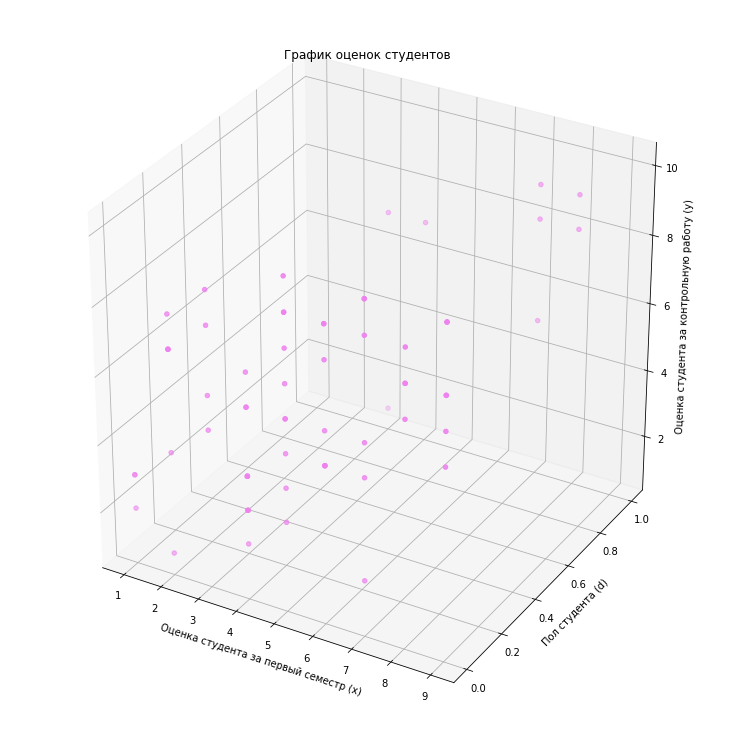

In [461]:
f = plt.figure(figsize=(10, 10))
axes = Axes3D(f)

axes.scatter(data['x2'], data['d2'], data['y2'], color='violet')
plt.title('График оценок студентов')
axes.set_xlabel('Оценка студента за первый семестр (x)')
axes.set_ylabel('Пол студента (d)')
axes.set_zlabel('Оценка студента за контрольную работу (y)')
plt.show()

Разделим выборку на обучающую и тестовую выборки.

In [462]:
x_train = data['x2'][:50]
x_test = data['x2'][50:]

d_train = data['d2'][:50]
d_test = data['d2'][50:]

X = pd.concat([pd.Series(np.ones(65, dtype=int)), data['x2'], data['d2']], axis=1)
X_train = np.matrix(X[:50])
X_test = np.matrix(X[50:])

y_train = data['y2'][:50]
y_test = data['y2'][50:]

<h2>Построим короткую (парную) регрессию y = α + β * x + ε:</h2>

In [463]:
x_mean = x_train.mean()
y_mean = y_train.mean()
print('x mean =', x_mean)
print('y mean =', y_mean)

x mean = 5.44
y mean = 6.56


In [464]:
xy_minus_mean = 0.0
x_minus_x_mean = 0.0
for i in range(len(x_train)):
    xy_minus_mean += (x_train[i] - x_mean) * (y_train[i] - y_mean)
    x_minus_x_mean += (x_train[i] - x_mean)**2

In [465]:
beta = xy_minus_mean / x_minus_x_mean
alpha = y_mean - beta * x_mean

In [466]:
print('beta =', beta)
print('alpha =', alpha)

beta = 0.5254369538077404
alpha = 3.7016229712858917


In [467]:
def line(x, beta, alpha):
    return beta * x + alpha

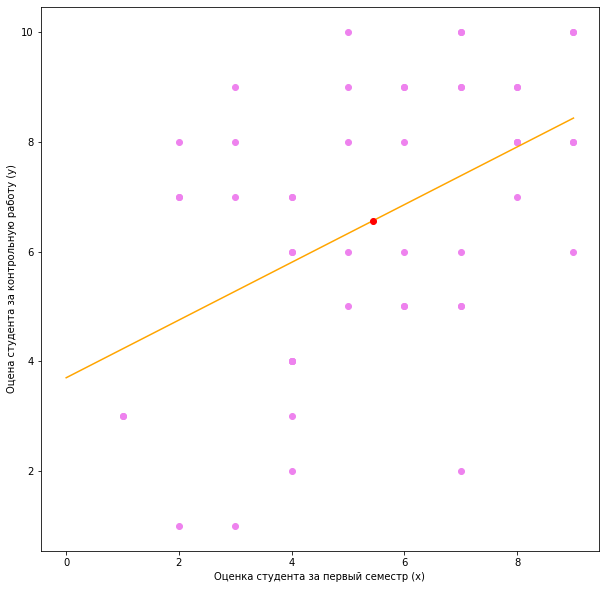

In [468]:
plt.figure(figsize=(10, 10))
plt.scatter(x_train, y_train, color='violet')
plt.xlabel('Оценка студента за первый семестр (x)')
plt.ylabel('Оцена студента за контрольную работу (y)')
plt.plot(range(0, 10), line(range(0, 10), beta, alpha), color='orange')
plt.plot(x_mean, y_mean, 'ro') 

Как можно заметить, прямая проходит примерно так, как и необходимо – ближе к верхней части графика таргет сильно разбросан: среди тех, у кого оценка за первый семестр лежит в диапазоне от 2 до 7 есть как получившие отличную оценку за контрольную, так и удовлетворительную или даже неудовлетворительную.

<h2>Построим длинную (множественную) регрессию y = X * β + ε:</h2>

Согласно методу МНК для множественной регрессии имеем формулу для оценки коэффициентов: 
\begin{equation*}
\beta = (X^T\cdot X)^{-1}\cdot X^T \cdot y
\end{equation*}

In [469]:
beta_m = np.linalg.inv((X_train.transpose() * X_train)) * X_train.transpose() * np.matrix(y_train).transpose() 

In [470]:
print("beta1 =", float(beta_m[0][0]), ", beta2 =", float(beta_m[1][0]), ", beta3 =", float(beta_m[2][0]))

beta1 = 3.716973287600045 , beta2 = 0.5265954682465445 , beta3 = -0.15466167758029215


In [471]:
def plane(x, d, beta1, beta2, beta3):
    return float(beta1) + float(beta2) * x + float(beta3) * d

Text(0.5, 0, 'Оценка студента за контрольную работу (y)')

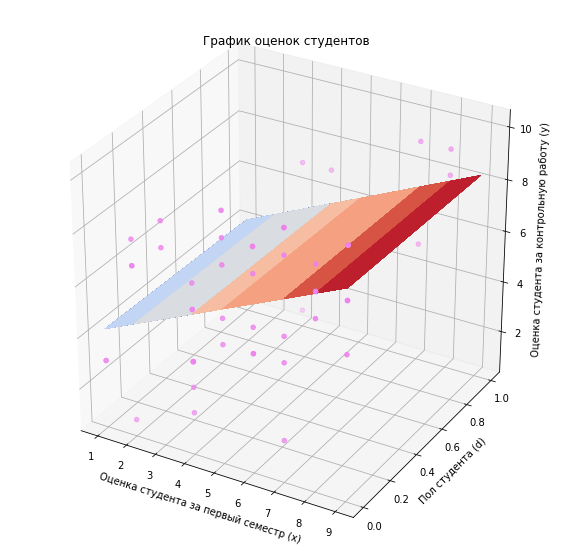

In [472]:
f = plt.figure(figsize=(10, 10))
ax = Axes3D(f)
ax = plt.axes(projection='3d')
ax.scatter(x_train, d_train, y_train, color='violet')

x, d = np.meshgrid(x_train, d_train)
y = plane(x, d, beta_m[0][0], beta_m[1][0], beta_m[2][0])
ax.plot_surface(x, d, y, cmap=cm.coolwarm)
plt.title('График оценок студентов')
ax.set_xlabel('Оценка студента за первый семестр (x)')
ax.set_ylabel('Пол студента (d)')
ax.set_zlabel('Оценка студента за контрольную работу (y)')

Рассчитаем коэффициент детерминации для короткой регрессии:

In [473]:
rss = sum([(y_train[i] - line(x_train[i], beta, alpha))**2 for i in range(len(y_train))])
tss = sum([(y_train[i] - y_mean)**2 for i in range(len(y_train))])
r2 = 1 - rss / tss

print('Коэффициент детерминации =', r2)

Коэффициент детерминации = 0.22952078664642728


In [474]:
rss = sum([(y_train[i] - plane(x_train[i], d_train[i], beta_m[0][0], beta_m[1][0], beta_m[2][0]))**2 for i in range(len(y_train))])
tss = sum([(y_train[i] - y_mean)**2 for i in range(len(y_train))])
r2 = 1 - rss / tss

print('Коэффициент детерминации =', r2)

Коэффициент детерминации = 0.22998671746639243


In [486]:
y_short_pred = [line(np.array(x_test)[i], beta, alpha) for i in range(len(x_test))]
y_short_pred

[6.328807740324594,
 5.277933832709113,
 4.752496878901372,
 6.854244694132333,
 8.430555555555555,
 6.328807740324594,
 5.803370786516853,
 4.752496878901372,
 6.328807740324594,
 7.379681647940075,
 4.2270599250936325,
 5.803370786516853,
 6.328807740324594,
 5.277933832709113,
 6.328807740324594]

In [484]:
mae_short = np.mean([abs(np.array(y_test)[i] - line(np.array(x_test)[i], beta, alpha)) for i in range(len(x_test))])
print('mae для короткой модели:', mae_short)
print('mae для короткой модели scikit-learn =', mean_absolute_error(y_test, y_short_pred))

mae для короткой модели: 1.6711818560133167
mae для короткой модели scikit-learn = 1.6711818560133167


In [445]:
y_long_pred = [plane(np.array(x_test)[i], d_train[i], beta_m[0][0], beta_m[1][0], beta_m[2][0]) for i in range(len(x_test))]
y_long_pred

[6.349950628832767,
 5.296759692339679,
 4.770164224093134,
 6.876546097079311,
 8.301670824238654,
 6.349950628832767,
 5.823355160586223,
 4.770164224093134,
 6.349950628832767,
 7.403141565325856,
 4.2435687558465895,
 5.823355160586223,
 6.349950628832767,
 5.142098014759386,
 6.349950628832767]

In [446]:
mae_long = np.mean([abs(np.array(y_test)[i] - plane(np.array(x_test)[i], d_train[i], beta_m[0][0], beta_m[1][0], beta_m[2][0])) for i in range(len(x_test))])
print('mae для длинной модели:', mae_long)
print('mae для длинной модели scikit-learn =', mean_absolute_error(y_test, y_long_pred))

mae для длинной модели: 1.6779977826282804
mae для длинной модели scikit-learn = 1.6779977826282804


In [447]:
print('Оценка, рассчитаная с помощью короткой регрессии:', line(5, beta, alpha))

Оценка, рассчитаная с помощью короткой регрессии: 6.328807740324594


In [448]:
print('Оценка, рассчитаная с помощью длинной регрессии:', plane(5, 1, beta_m[0][0], beta_m[1][0], beta_m[2][0]))

Оценка, рассчитаная с помощью длинной регрессии: 6.195288951252475


In [449]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
regr = LinearRegression()

Рассчитаем R^2 для парной регрессии:

In [488]:
regr.fit(np.array(x_train).reshape(-1, 1), y_train)
print('beta =', float(regr.coef_))
print('alpha =', float(regr.intercept_))
y_pred = regr.predict(np.array(x_train).reshape(-1, 1))
print('r2 для короткой модели =', r2_score(y_train, y_pred))

beta = 0.52543695380774
alpha = 3.7016229712858935
r2 для короткой модели = 0.2295207866464274


Найдем прогнозы для тестовой выборки по модели парной регрессии и MAE:

In [451]:
y_pred = regr.predict(np.array(x_test).reshape(-1, 1))
print(y_pred)
print('mae для короткой модели =', mean_absolute_error(y_test, y_pred))

[6.32880774 5.27793383 4.75249688 6.85424469 8.43055556 6.32880774
 5.80337079 4.75249688 6.32880774 7.37968165 4.22705993 5.80337079
 6.32880774 5.27793383 6.32880774]
mae для короткой модели = 1.6711818560133167


Найдем прогноз оценки по модели короткой регресии:

In [452]:
mark = np.array(5).reshape(-1, 1)
prediction = regr.predict(mark)
print(float(prediction))

6.328807740324594


Найдем R^2 для множественной регрессии:

In [489]:
regr = LinearRegression()
regr.fit(X_train, y_train)
print('beta1 =', float(regr.intercept_), 'beta2 =', regr.coef_[1], 'beta3 =', regr.coef_[2])
y_pred_l = regr.predict(X_train)
print('r2 для длинной модели =', r2_score(y_train, y_pred_l))

beta1 = 3.71697328760004 beta2 = 0.5265954682465441 beta3 = -0.1546616775802933
r2 для длинной модели = 0.22998671746639243


Найдем прогнозы для тестовой выборки по модели множественной регрессии и MAE:

In [454]:
y_pred_l = regr.predict(X_test)
print(y_pred_l)
print('mae для длинной модели =', mean_absolute_error(y_test, y_pred_l))

[6.34995063 5.29675969 4.77016422 6.8765461  8.4563325  6.34995063
 5.82335516 4.77016422 6.34995063 7.24847989 4.24356876 5.82335516
 6.34995063 5.29675969 6.34995063]
mae для длинной модели = 1.688308561133631


Найдем прогноз оценки по модели длинной регресии:

In [455]:
mark = np.matrix(pd.concat([pd.Series([1]), pd.Series([5]), pd.Series([1])], axis=1))
prediction = regr.predict(mark)
print(float(prediction))

6.195288951252468
